In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))




In [5]:
x1.shape

(5000, 2)

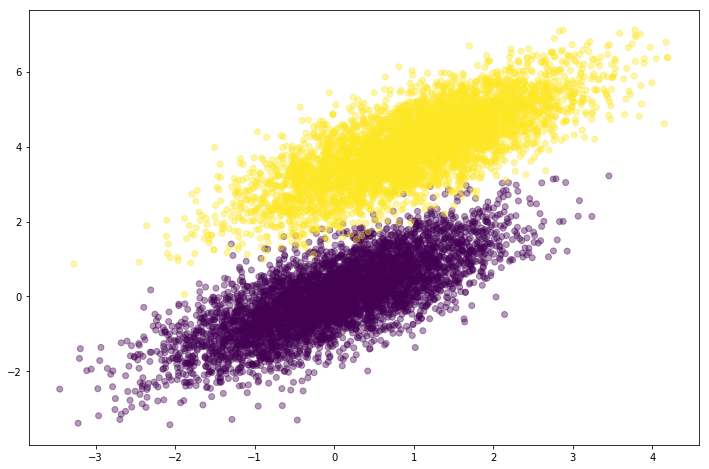

In [2]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)

In [6]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [7]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [24]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        print("features", features.shape)
        
    weights = np.zeros(features.shape[1])
    print("weights", weights.shape)
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)
        print ("predictions", predictions)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 1 == 0:
            print (log_likelihood(features, target, weights))
            print("-------------------------------------------")
        
    return weights

In [25]:
simulated_separableish_features.shape

(10000, 2)

In [26]:
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 30, learning_rate = 5e-5, add_intercept=True)

features (10000, 3)
weights (3,)
predictions [0.5 0.5 0.5 ... 0.5 0.5 0.5]
-4346.264779152365
-------------------------------------------
predictions [0.40933872 0.40900526 0.34438045 ... 0.91517011 0.89531785 0.93250704]
-4076.665290158282
-------------------------------------------
predictions [0.37591152 0.3714345  0.30498215 ... 0.92700764 0.91218206 0.94489174]
-3846.247657644746
-------------------------------------------
predictions [0.34680076 0.33842486 0.27279263 ... 0.9326386  0.92179047 0.95134901]
-3641.818743448813
-------------------------------------------
predictions [0.32092711 0.30900918 0.24551838 ... 0.93559683 0.92818461 0.95530095]
-3457.9688134016856
-------------------------------------------
predictions [0.29771243 0.2826546  0.22197921 ... 0.93721571 0.93291438 0.95800257]
-3291.5298417448157
-------------------------------------------
predictions [0.2767737  0.25898696 0.20144114 ... 0.93811328 0.93669607 0.96001922]
-3140.2165114503514
---------------------

In [30]:
data_with_intercept = np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                 simulated_separableish_features))
data_with_intercept.shape


(10000, 3)

In [31]:
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

In [32]:
print ('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))

Accuracy from scratch: 0.9731


In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#!pip install seaborn
#import seaborn as sns
from sklearn import datasets

In [45]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

In [46]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [47]:
model = LogisticRegression(lr=0.1, num_iter=300000)


In [48]:
model.fit(X, y)

In [49]:
preds = model.predict(X)
(preds == y).mean()

1.0

In [50]:
model.theta


array([-25.96818124,  12.56179068, -13.44549335])